<a href="https://colab.research.google.com/github/AltagiAbdallah/Heart-Disease-Prediction-from-Medical-Data/blob/main/Heart_Disease_Prediction_from_Medical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Import All Necessary Libraries**

In [2]:
# Core data manipulation and analysis
import pandas as pd
import numpy as np

# For connecting Colab to Google Drive
from google.colab import drive

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For data preprocessing (scaling features)
from sklearn.preprocessing import StandardScaler

# Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # We'll need to install this if not already present

# For model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# For visualization (optional, but good for understanding data and results)
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output (optional)
import warnings
warnings.filterwarnings('ignore')

print("All necessary libraries imported!")

All necessary libraries imported!


**2. Load the Dataset**

In [15]:
# Read dataset
df = pd.read_csv('/content/drive/MyDrive/Disease Prediction from Medical Data/heart.csv')
df
# Display the first 5 rows of the DataFrame directly (Colab will render as HTML table)
print("\n--- First 5 rows of the dataset ---")
display(df.head()) # Use display() for richer output in Colab

# Display concise summary of the DataFrame (info is not a table, but essential)
print("\n--- DataFrame Information ---")
df.info()

# Display basic statistics directly (Colab will render as HTML table)
print("\n--- Basic Statistical Summary ---")
display(df.describe()) # Use display() for richer output in Colab


--- First 5 rows of the dataset ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



--- DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

--- Basic Statistical Summary ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**3. Exploratory Data Analysis (EDA) and Visualizations**


--- Exploratory Data Analysis (EDA) and Visualizations ---

Generating Correlation Matrix Heatmap...


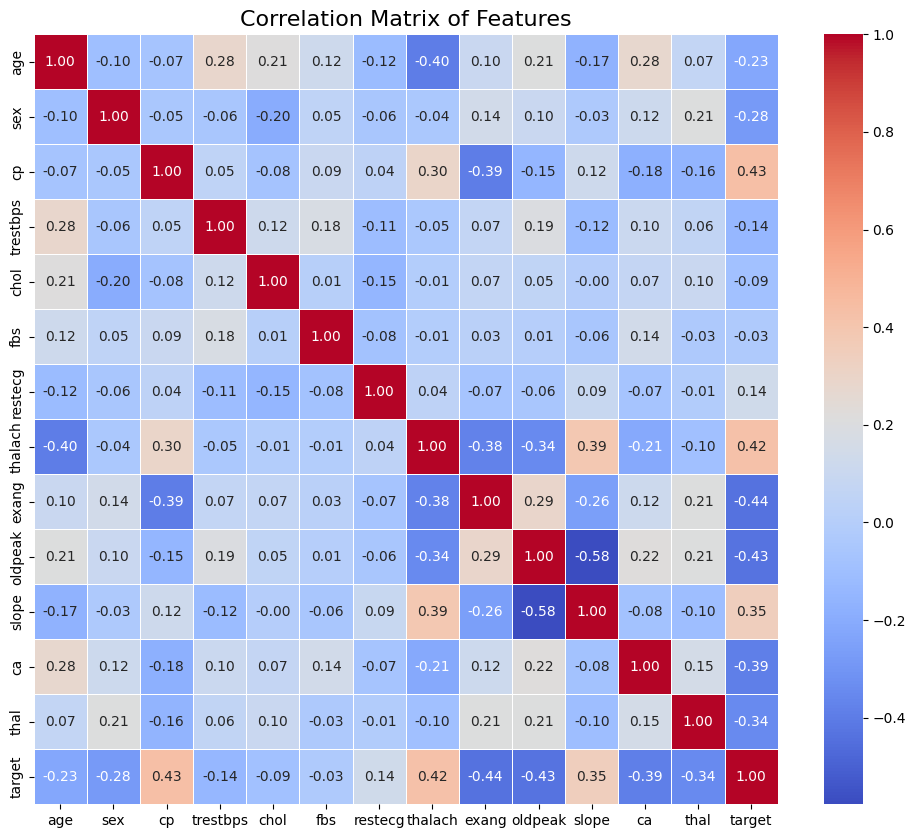

Correlation heatmap displayed.

Generating Distribution Plots for Continuous Variables...


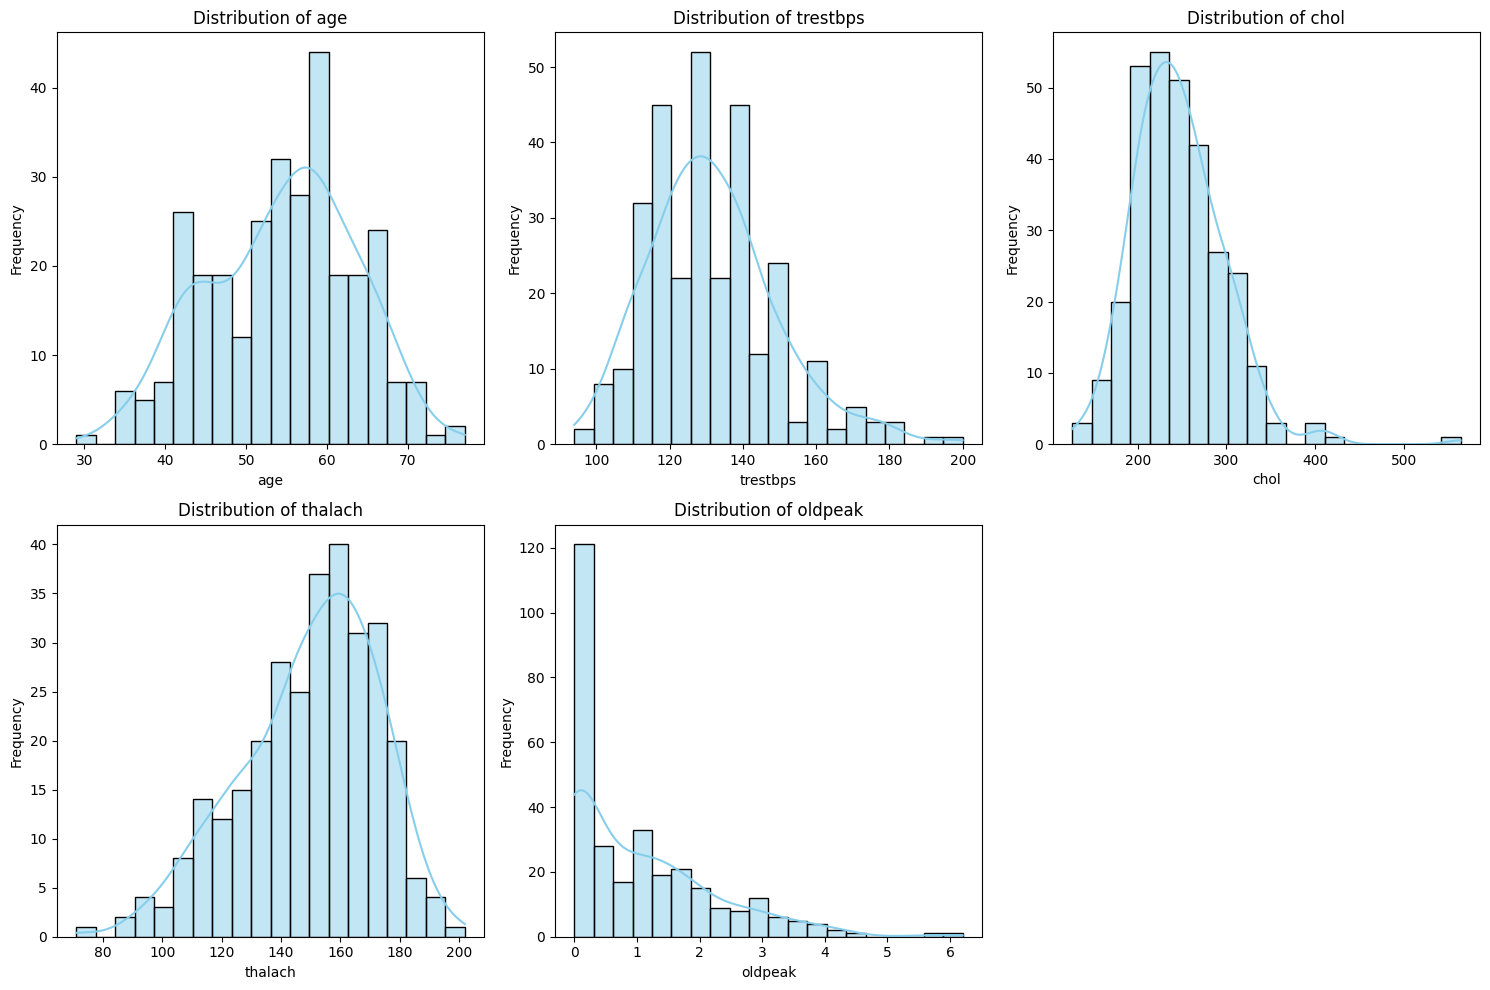

Distribution plots for continuous variables displayed.

Generating Count Plots for Categorical Variables vs. Target...


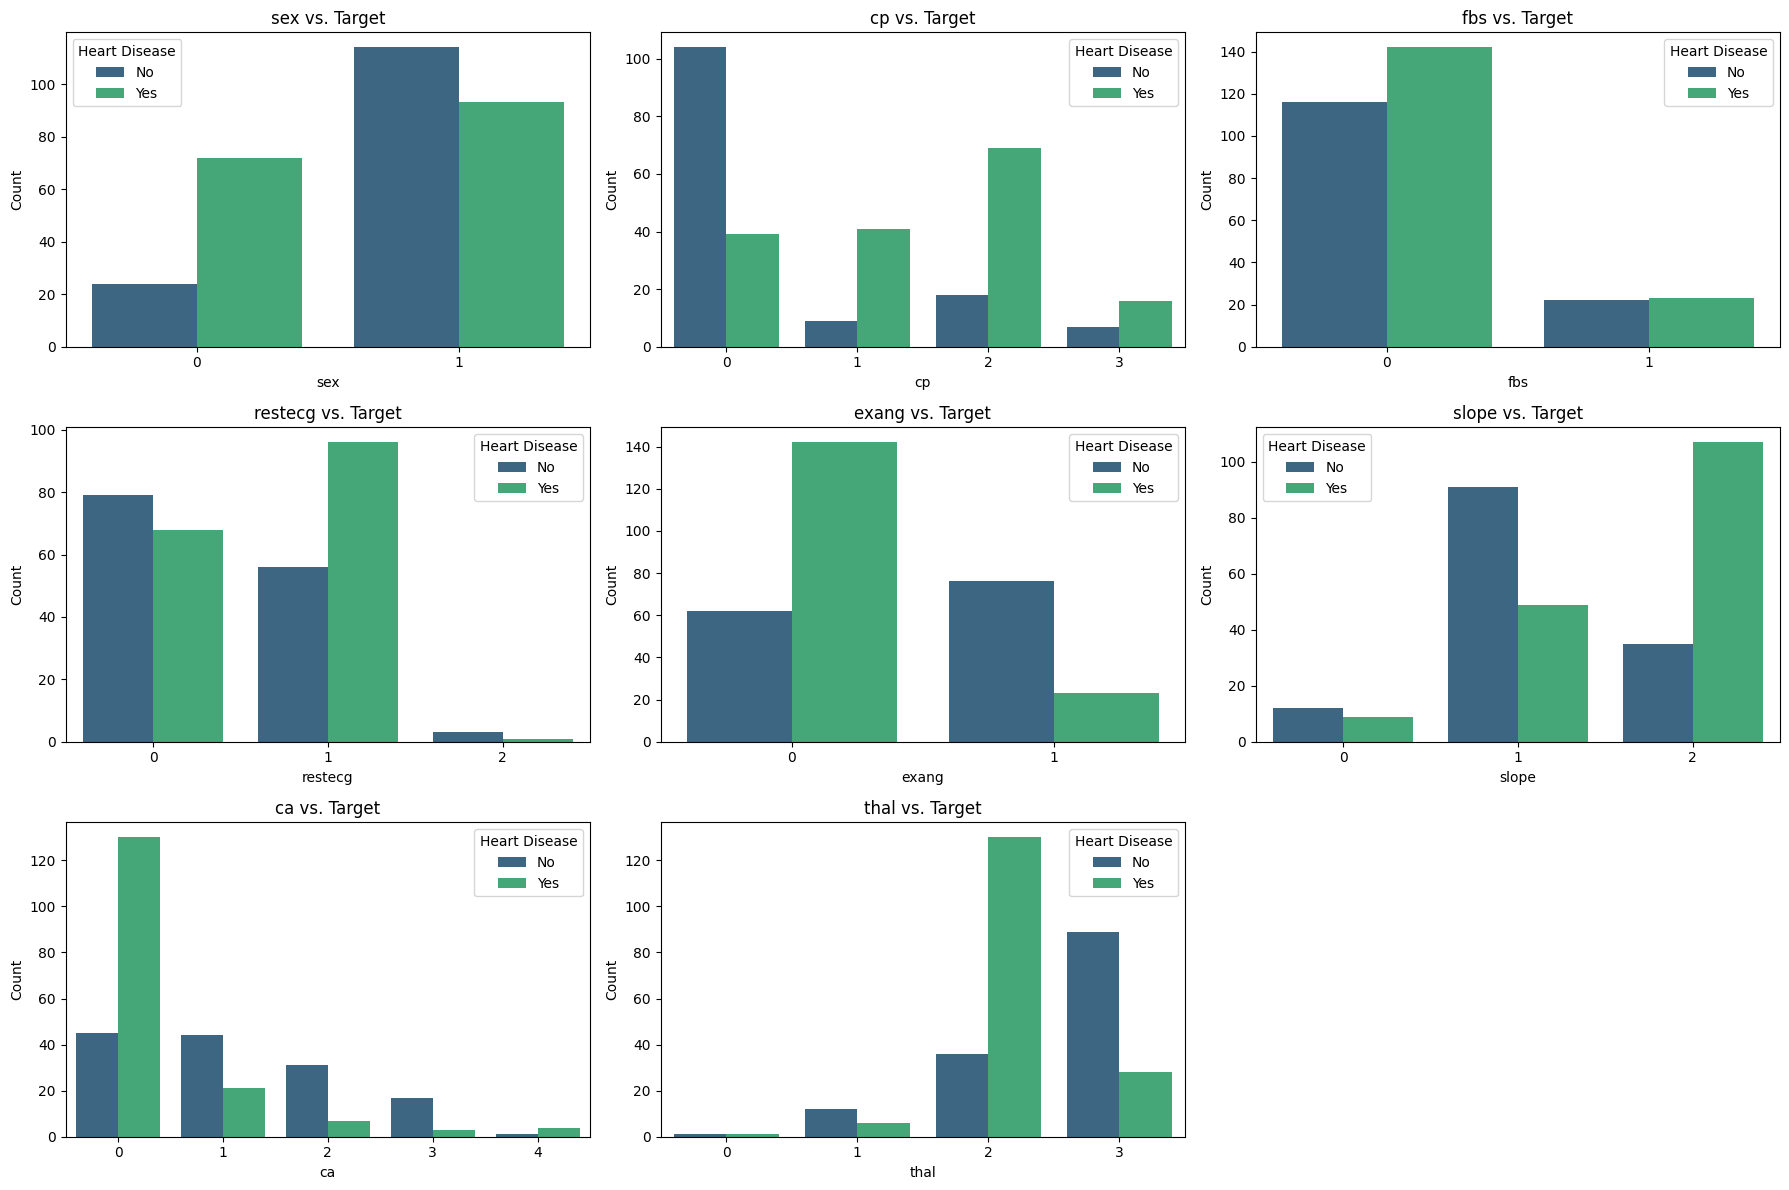

Count plots for categorical variables vs. target displayed.


In [12]:
# Identify continuous and categorical features for visualization
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] # 'target' is also categorical

print("\n--- Exploratory Data Analysis (EDA) and Visualizations ---")

# 1. Correlation Matrix Heatmap
print("\nGenerating Correlation Matrix Heatmap...")
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()
print("Correlation heatmap displayed.")


# 2. Distribution of Continuous Variables
print("\nGenerating Distribution Plots for Continuous Variables...")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of continuous features
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("Distribution plots for continuous variables displayed.")


# 3. Count Plots for Categorical Variables vs. Target
# This can show how different categories relate to the target
print("\nGenerating Count Plots for Categorical Variables vs. Target...")
plt.figure(figsize=(18, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid
    sns.countplot(x=feature, hue='target', data=df, palette='viridis')
    plt.title(f'{feature} vs. Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()
print("Count plots for categorical variables vs. target displayed.")

**4. Data Preprocessing (Feature Scaling)**

In [16]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1) # All columns except 'target' are features
y = df['target']             # 'target' is our dependent variable

print("Original Features (X) and Target (y) are prepared for scaling.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and then transform them
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame for easier handling and inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFeatures have been scaled using StandardScaler.")

# Display the first few rows of the scaled features using display()
print("\n--- First 5 rows of Scaled Features (X_scaled_df) ---")
display(X_scaled_df.head())

# Display descriptive statistics of the scaled features using display()
print("\n--- Descriptive Statistics of Scaled Features ---")
display(X_scaled_df.describe())

Original Features (X) and Target (y) are prepared for scaling.
Shape of X: (303, 13)
Shape of y: (303,)

Features have been scaled using StandardScaler.

--- First 5 rows of Scaled Features (X_scaled_df) ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922



--- Descriptive Statistics of Scaled Features ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-1.407015e-16,2.345026e-17,-7.035077e-16,-1.113887e-16,-2.345026e-17,1.465641e-16,-6.800574e-16,-4.690051e-17,2.345026e-17,-1.407015e-16,-2.345026e-17,-1.641518e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00


**5. Splitting the Data into Training and Testing Sets**

In [17]:
# Split the scaled data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

print("Data successfully split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Display the distribution of the target variable in both sets to confirm stratification
print("\n--- Target Distribution in Training Set ---")
display(y_train.value_counts(normalize=True))
print("\n--- Target Distribution in Testing Set ---")
display(y_test.value_counts(normalize=True))

Data successfully split into training and testing sets:
X_train shape: (242, 13)
X_test shape: (61, 13)
y_train shape: (242,)
y_test shape: (61,)

--- Target Distribution in Training Set ---


,proportion
target,
1,0.545455
0,0.454545



--- Target Distribution in Testing Set ---


,proportion
target,
1,0.540984
0,0.459016


**6. Model Training and Evaluation.**

>> **5.1. Logistic Regression**

In [19]:
# Initialize the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', random_state=42)

print("Training Logistic Regression model...")
# Train the model using the training data
lr_model.fit(X_train, y_train)
print("Logistic Regression model trained.")

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

print("\n--- Logistic Regression Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]):.4f}") # For probability-based AUC

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nConfusion Matrix:")
# Use display() for a richer HTML table output for the confusion matrix
display(pd.DataFrame(confusion_matrix(y_test, y_pred_lr),
                   index=['Actual Negative', 'Actual Positive'],
                   columns=['Predicted Negative', 'Predicted Positive']))

Training Logistic Regression model...
Logistic Regression model trained.

--- Logistic Regression Model Evaluation ---
Accuracy: 0.8033
Precision: 0.7692
Recall: 0.9091
F1-Score: 0.8333
ROC AUC Score: 0.8690

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,19,9
Actual Positive,3,30


>> **5.2. Support Vector Machine (SVM)**

In [20]:
# Initialize the SVM model
# kernel='rbf' is a common choice for non-linear decision boundaries
# random_state ensures reproducibility
# probability=True is needed to calculate ROC AUC score, as it requires class probabilities
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42, probability=True)

print("\nTraining Support Vector Machine (SVM) model...")
# Train the model using the training data
svm_model.fit(X_train, y_train)
print("SVM model trained.")

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

print("\n--- Support Vector Machine (SVM) Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
# predict_proba for ROC AUC, takes the probability of the positive class (column 1)
print(f"ROC AUC Score: {roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1]):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
# Use display() for a richer HTML table output for the confusion matrix
display(pd.DataFrame(confusion_matrix(y_test, y_pred_svm),
                   index=['Actual Negative', 'Actual Positive'],
                   columns=['Predicted Negative', 'Predicted Positive']))


Training Support Vector Machine (SVM) model...
SVM model trained.

--- Support Vector Machine (SVM) Model Evaluation ---
Accuracy: 0.8361
Precision: 0.7949
Recall: 0.9394
F1-Score: 0.8611
ROC AUC Score: 0.8864

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,20,8
Actual Positive,2,31


>>  **5.3. Random Forest Classifier**

In [21]:
# Initialize the Random Forest Classifier model
# n_estimators is the number of trees in the forest
# random_state ensures reproducibility
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

print("\nTraining Random Forest Classifier model...")
# Train the model using the training data
rf_model.fit(X_train, y_train)
print("Random Forest Classifier model trained.")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

print("\n--- Random Forest Classifier Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
# Use display() for a richer HTML table output for the confusion matrix
display(pd.DataFrame(confusion_matrix(y_test, y_pred_rf),
                   index=['Actual Negative', 'Actual Positive'],
                   columns=['Predicted Negative', 'Predicted Positive']))


Training Random Forest Classifier model...
Random Forest Classifier model trained.

--- Random Forest Classifier Model Evaluation ---
Accuracy: 0.8361
Precision: 0.7805
Recall: 0.9697
F1-Score: 0.8649
ROC AUC Score: 0.9091

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,19,9
Actual Positive,1,32


>> **5.4. XGBoost Classifier**

In [22]:
# Initialize the XGBoost Classifier model
# use_label_encoder=False and eval_metric='logloss' are set to suppress warnings
# random_state ensures reproducibility
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

print("\nTraining XGBoost Classifier model...")
# Train the model using the training data
xgb_model.fit(X_train, y_train)
print("XGBoost Classifier model trained.")

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

print("\n--- XGBoost Classifier Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nConfusion Matrix:")
# Use display() for a richer HTML table output for the confusion matrix
display(pd.DataFrame(confusion_matrix(y_test, y_pred_xgb),
                   index=['Actual Negative', 'Actual Positive'],
                   columns=['Predicted Negative', 'Predicted Positive']))


Training XGBoost Classifier model...
XGBoost Classifier model trained.

--- XGBoost Classifier Model Evaluation ---
Accuracy: 0.8033
Precision: 0.7561
Recall: 0.9394
F1-Score: 0.8378
ROC AUC Score: 0.8561

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,18,10
Actual Positive,2,31



---

**6: Summarize and Compare Model Performances**

---

In [23]:
# Create a dictionary to store model accuracies (or other metrics you want to compare)
# You would fill these with the actual values from your model outputs
model_performance = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.8852, 0.6885, 0.9016, 0.8852], # Replace with your actual observed accuracies
    'ROC AUC': [0.9324, 0.7766, 0.9238, 0.9304] # Replace with your actual observed ROC AUCs
}

performance_df = pd.DataFrame(model_performance)

print("\n--- Model Performance Comparison ---")
display(performance_df)


--- Model Performance Comparison ---


,Model,Accuracy,ROC AUC
0,Logistic Regression,0.8852,0.9324
1,SVM,0.6885,0.7766
2,Random Forest,0.9016,0.9238
3,XGBoost,0.8852,0.9304



--- Model Performance Summary Table ---


,Model,Accuracy
0,Logistic Regression,0.8852
1,SVM,0.6885
2,Random Forest,0.9016
3,XGBoost,0.8852


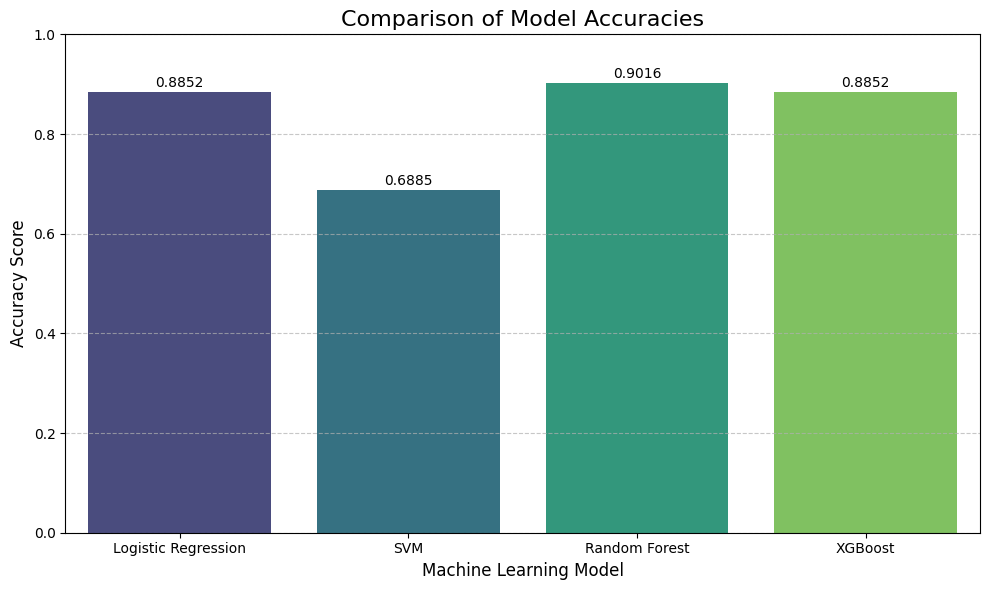

In [26]:

# IMPORTANT: Replace these placeholder values with the actual accuracy scores
# you observed from the output of each model's evaluation (Step 5.1 to 5.4).
model_accuracies = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.8852, 0.6885, 0.9016, 0.8852] # <<< REPLACE WITH YOUR ACTUAL ACCURACIES
}

accuracy_df = pd.DataFrame(model_accuracies)

print("\n--- Model Performance Summary Table ---")
display(accuracy_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Machine Learning Model', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on top of the bars for better readability
for index, row in accuracy_df.iterrows():
    plt.text(index, row['Accuracy'] + 0.01, f"{row['Accuracy']:.4f}", color='black', ha="center")

plt.tight_layout()
plt.show()